In [38]:
import os
import cv2  # Computer Vision (Images) / Manipulation
import keras
from sklearn.metrics import *
from keras.models import Sequential
from keras.callbacks import ReduceLROnPlateau

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization


In [2]:
!pip install kagglehub

In [3]:
!pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

100%|██████████| 2.29G/2.29G [00:57<00:00, 42.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2


In [4]:
dataset_dir="/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2"

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
 # Define the Labels for our data
labels = ["PNEUMONIA", "NORMAL"]
# Defining the image
image_size = 150

In [11]:
def get_training_data(data_dir):
  data = []

  for x in labels:
    path = os.path.join(data_dir, x)
    class_num = labels.index(x)

    for img in os.listdir(path):
      try:
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        resized_arr = cv2.resize(img_arr, (image_size, image_size))
        data.append([resized_arr, class_num])
      except Exception as e:
        print(e)
  return np.array(data, dtype=object)

In [12]:
# Training
train = get_training_data("/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/train")
# Testing
test = get_training_data("/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/test")
# Validation
validation = get_training_data("/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/val")

In [25]:
a = []

for x in train:
  if(x[1] == 0):
    a.append("PNEUMONIA")
  else:
    a.append("NORMAL")

<Axes: xlabel='count'>

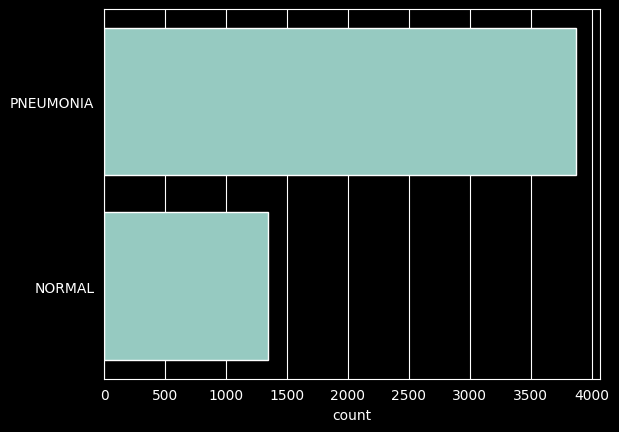

In [26]:
sns.set_style("darkgrid")
plt.style.use("dark_background")
sns.countplot(a)

**So, in this case the data is imbalanced. To increase the number of

*   List item
*   List item

training examples, we will use `data augmentation`**

Text(0.5, 1.0, 'NORMAL')

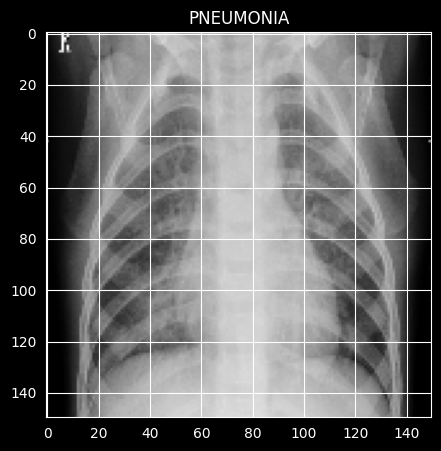

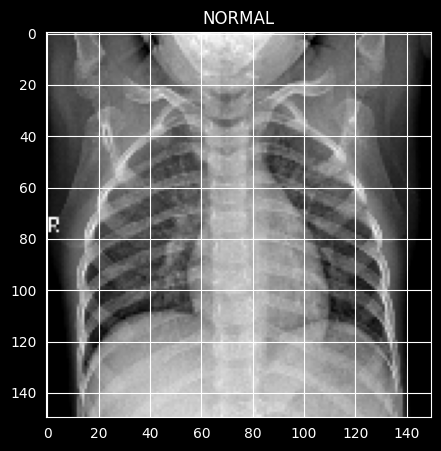

In [27]:
plt.figure(figsize = (5, 5))
plt.imshow(train[0][0], cmap = "gray")
plt.title(labels[train[0][1]])

plt.figure(figsize = (5, 5))
plt.imshow(train[-1][0], cmap = "gray")
plt.title(labels[train[-1][1]])

In [28]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

In [29]:
for feat, label in train:
  x_train.append(feat)
  y_train.append(label)

In [30]:
for feat, label in validation:
  x_val.append(feat)
  y_val.append(label)

for feat, label in test:
  x_test.append(feat)
  y_test.append(label)

In [31]:
x_train = np.array(x_train) / 255

x_val = np.array(x_val) / 255

x_test = np.array(x_test) / 255

In [32]:
x_train = x_train.reshape(-1, image_size, image_size, 1)
y_train = np.array(y_train)

x_test = x_test.reshape(-1, image_size, image_size, 1)
y_test = np.array(y_test)

x_val = x_val.reshape(-1, image_size, image_size, 1)
y_val = np.array(y_val)

In [33]:
datagen = ImageDataGenerator(
    rotation_range = 30,
    zoom_range = 0.2,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    vertical_flip = False)

In [34]:
datagen.fit(x_train)

In [35]:
model = Sequential()

model.add(Conv2D(32, (3, 3), strides = 1, padding = "same", activation = "relu", input_shape = (150, 150, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides = 2, padding = "same"))

model.add(Conv2D(64, (3, 3), strides = 1, padding = "same", activation = "relu"))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides = 2, padding = "same"))

model.add(Conv2D(64, (3, 3), strides = 1, padding = "same", activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides = 2, padding = "same"))

model.add(Conv2D(128, (3, 3), strides = 1, padding = "same", activation = "relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides = 2, padding = "same"))

model.add(Conv2D(256, (3, 3), strides = 1, padding = "same", activation = "relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2), strides = 2, padding = "same"))

model.add(Flatten())
model.add(Dense(units = 128, activation = "relu"))

model.add(Dropout(0.2))

model.add(Dense(units = 1, activation = "sigmoid"))
model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics =["accuracy"])

In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 150, 150, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 75, 75, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 38, 38, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 38, 38, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 38, 38, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 19, 19, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 19, 19, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 19, 19, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 19, 19, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 10, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 10, 10, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │              

 Total params: 1,246,401 (4.75 MB)

 Trainable params: 1,245,313 (4.75 MB)

 Non-trainable params: 1,088 (4.25 KB)

In [39]:
learning_rate_reduction = ReduceLROnPlateau(monitor = "val_accurary", patience = 2, verbose = 1, factor = 0.3, min_lr = 0.000001)

In [40]:
history = model.fit(
    datagen.flow(x_train, y_train, batch_size = 32),
    epochs = 12,
    validation_data = datagen.flow(x_val, y_val),
    callbacks = [learning_rate_reduction])

Epoch 1/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 24s 76ms/step - accuracy: 0.7945 - loss: 1.3401 - val_accuracy: 0.5000 - val_loss: 50.9210 - learning_rate: 0.0010
Epoch 2/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - accuracy: 0.9070 - loss: 0.2618 - val_accuracy: 0.5000 - val_loss: 27.5335 - learning_rate: 0.0010
Epoch 3/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 12s 73ms/step - accuracy: 0.9184 - loss: 0.2284 - val_accuracy: 0.5000 - val_loss: 70.6772 - learning_rate: 0.0010
Epoch 4/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 11s 70ms/step - accuracy: 0.9365 - loss: 0.1881 - val_accuracy: 0.5625 - val_loss: 2.1592 - learning_rate: 0.0010
Epoch 5/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 11s 70ms/step - accuracy: 0.9293 - loss: 0.1741 - val_accuracy: 0.5000 - val_loss: 2.2035 - learning_rate: 0.0010
Epoch 6/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 11s 70ms/step - accuracy: 0.9358 - loss: 0.1717 - val_accuracy: 0.5000 - val_loss: 2.0118 - learning_rate: 0.0010
Epoch 7/12
163/163 ━━━━━━━━━━━━━━━━━━━━ 11s 69ms/step - accuracy: 0.9454 

In [ ]:
print(f"Loss of Model: {model.evaluate(x_test, y_test)[0]}")

In [ ]:
print(f"Accuracy of Model: {model.evaluate(x_test, y_test)[1]*100}%")

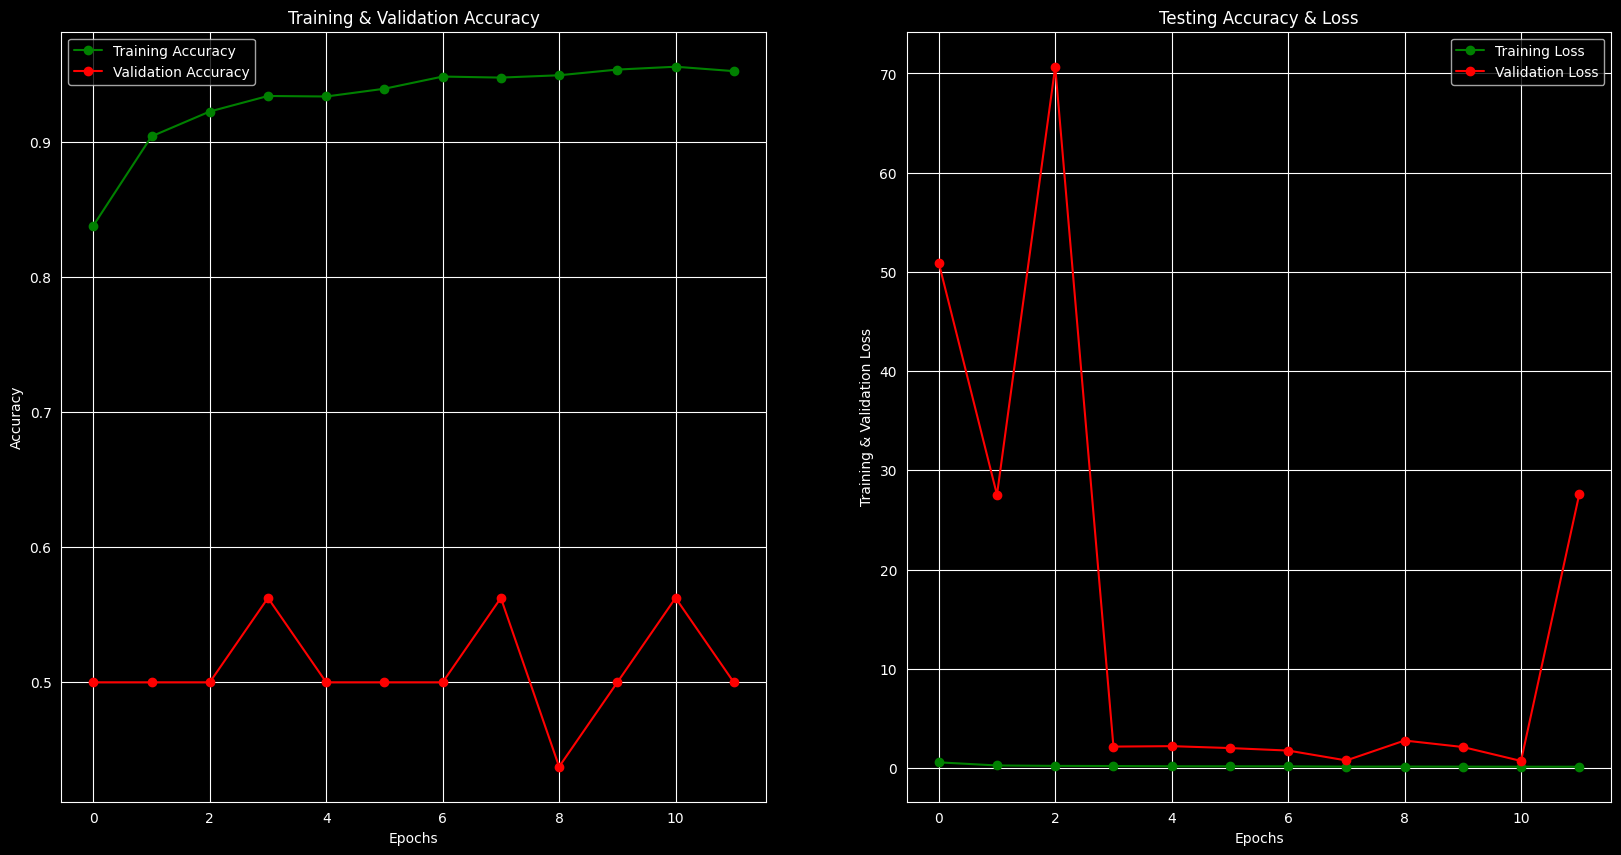

In [41]:
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [42]:
predictions = model.predict(x_test)
predictions = predictions.reshape(1,-1)[0]
predictions[:15]

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step


array([4.9934895e-38, 7.2263267e-13, 8.4643467e-14, 5.2300709e-11,
       2.3322681e-02, 1.3934391e-24, 1.1390554e-01, 0.0000000e+00,
       7.7167373e-05, 3.2826423e-14, 5.5938720e-23, 0.0000000e+00,
       0.0000000e+00, 3.7978730e-32, 1.5401965e-18], dtype=float32)

In [43]:
predictions = (predictions > 0.5).astype(int)
predictions[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [44]:
print(classification_report(y_test, predictions, target_names = labels))

              precision    recall  f1-score   support

   PNEUMONIA       0.63      1.00      0.77       390
      NORMAL       0.50      0.00      0.01       234

    accuracy                           0.62       624
   macro avg       0.56      0.50      0.39       624
weighted avg       0.58      0.62      0.48       624



In [45]:
correct = np.nonzero(predictions == y_test)[0]
incorrect = np.nonzero(predictions != y_test)[0]

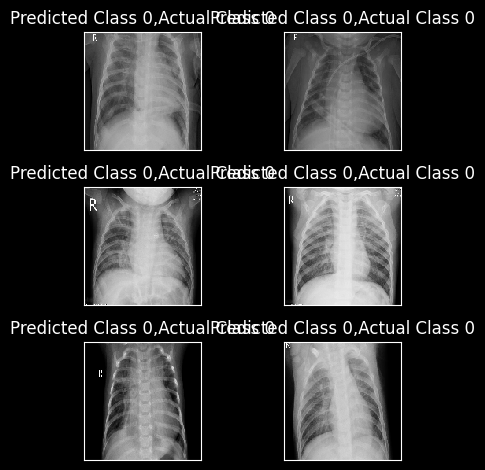

In [46]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

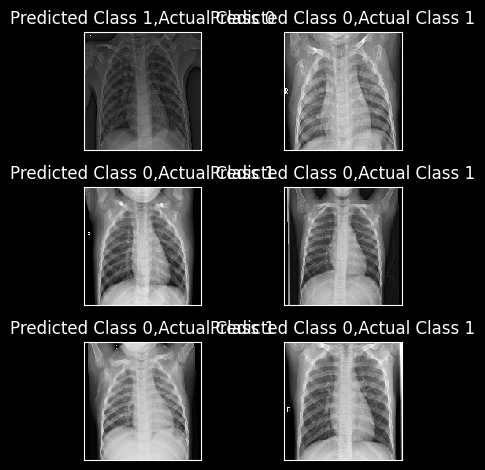

In [47]:
i = 0
for c in incorrect[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1